In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("smartphones.csv")

In [3]:
df.head()

,Smartphone,Brand,Model,RAM,Storage,Color,Free,Final Price
0,Realme C55 8/256GB Sunshower Libre,Realme,C55,8.0,256.0,Yellow,Yes,231.60
1,Samsung Galaxy M23 5G 4/128GB Azul Libre,Samsung,Galaxy M23,4.0,128.0,Blue,Yes,279.00
2,Motorola Moto G13 4/128GB Azul Lavanda Libre,Motorola,Moto G13,4.0,128.0,Blue,Yes,179.01
3,Xiaomi Redmi Note 11S 6/128GB Gris Libre,Xiaomi,Redmi Note 11S,6.0,128.0,Gray,Yes,279.99
4,Nothing Phone (2) 12/512GB Blanco Libre,Nothing,Phone (2),12.0,512.0,White,Yes,799.00


In [4]:
df.drop(columns=['Free'],inplace=True)

In [5]:
df.shape

(1816, 7)

In [6]:
df.duplicated().sum()

0

<h1>Filling mssing values</h1>

In [7]:
df.describe()

,RAM,Storage,Final Price
count,1333.00000,1791.000000,1816.000000
mean,5.96099,162.652150,492.175573
std,2.66807,139.411605,398.606183
min,1.00000,2.000000,60.460000
25%,4.00000,64.000000,200.990000
50%,6.00000,128.000000,349.990000
75%,8.00000,256.000000,652.717500
max,12.00000,1000.000000,2271.280000


In [8]:
from sklearn.impute import SimpleImputer

In [9]:
imputer = SimpleImputer(strategy='most_frequent')

In [10]:
encoded_storage = imputer.fit_transform(df[['Storage']])

In [11]:
df['Storage'] = encoded_storage

In [12]:
df.head()

,Smartphone,Brand,Model,RAM,Storage,Color,Final Price
0,Realme C55 8/256GB Sunshower Libre,Realme,C55,8.0,256.0,Yellow,231.60
1,Samsung Galaxy M23 5G 4/128GB Azul Libre,Samsung,Galaxy M23,4.0,128.0,Blue,279.00
2,Motorola Moto G13 4/128GB Azul Lavanda Libre,Motorola,Moto G13,4.0,128.0,Blue,179.01
3,Xiaomi Redmi Note 11S 6/128GB Gris Libre,Xiaomi,Redmi Note 11S,6.0,128.0,Gray,279.99
4,Nothing Phone (2) 12/512GB Blanco Libre,Nothing,Phone (2),12.0,512.0,White,799.00


In [13]:
encoded_RAM = imputer.fit_transform(df[["RAM"]])
df['RAM'] = encoded_RAM

In [14]:
df.head()

,Smartphone,Brand,Model,RAM,Storage,Color,Final Price
0,Realme C55 8/256GB Sunshower Libre,Realme,C55,8.0,256.0,Yellow,231.60
1,Samsung Galaxy M23 5G 4/128GB Azul Libre,Samsung,Galaxy M23,4.0,128.0,Blue,279.00
2,Motorola Moto G13 4/128GB Azul Lavanda Libre,Motorola,Moto G13,4.0,128.0,Blue,179.01
3,Xiaomi Redmi Note 11S 6/128GB Gris Libre,Xiaomi,Redmi Note 11S,6.0,128.0,Gray,279.99
4,Nothing Phone (2) 12/512GB Blanco Libre,Nothing,Phone (2),12.0,512.0,White,799.00


In [15]:
df.isnull().sum()

Smartphone     0
Brand          0
Model          0
RAM            0
Storage        0
Color          0
Final Price    0
dtype: int64

<h1>EDA perform</h1>

<Axes: xlabel='Storage', ylabel='Final Price'>

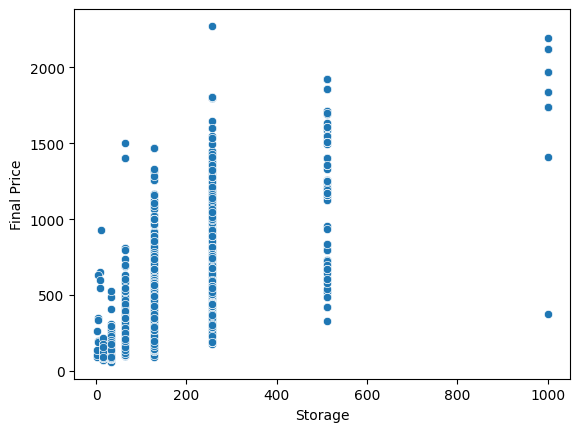

In [16]:
sns.scatterplot(x=df["Storage"],y=df["Final Price"])

<Axes: xlabel='RAM', ylabel='Final Price'>

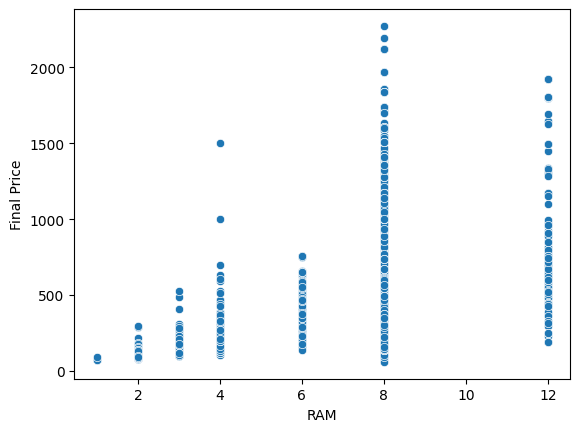

In [17]:
sns.scatterplot(x=df["RAM"],y=df["Final Price"])

<Axes: xlabel='RAM', ylabel='Storage'>

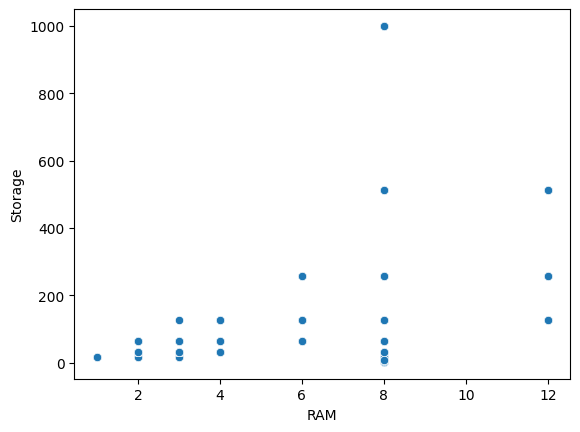

In [18]:
sns.scatterplot(x=df["RAM"],y=df["Storage"])

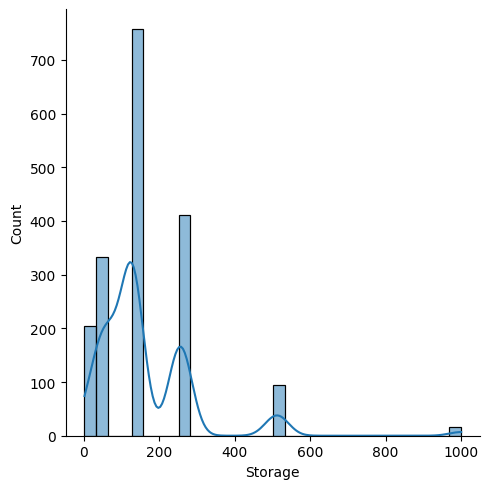

In [19]:
sns.displot(df["Storage"],kde=True,legend=True)

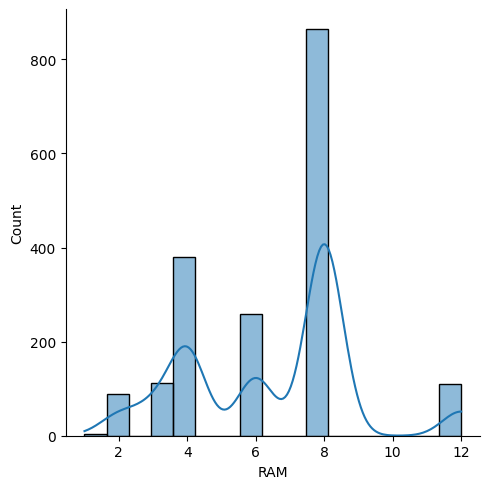

In [20]:
sns.displot(df["RAM"],kde=True,legend=True)

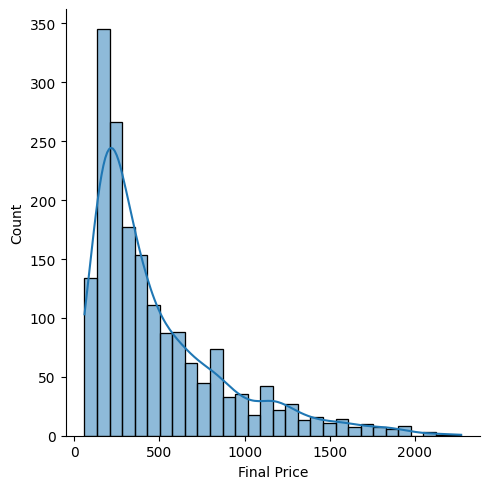

In [21]:
sns.displot(df["Final Price"],kde=True,legend=True)

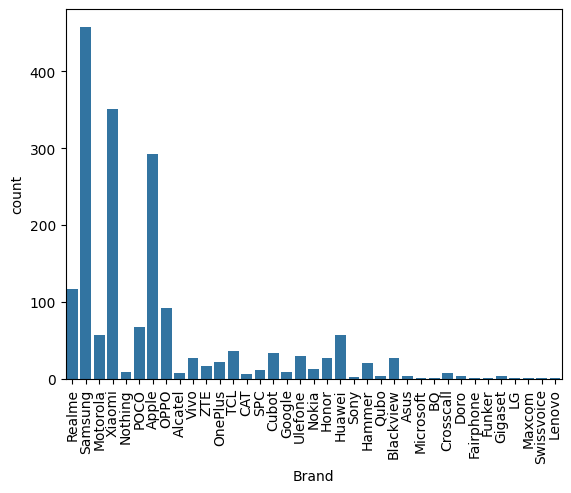

In [22]:
sns.countplot(x="Brand",data=df,legend=True)
plt.xticks(rotation='vertical')
plt.show()

In [23]:
df["Model"].value_counts().sum()

1816

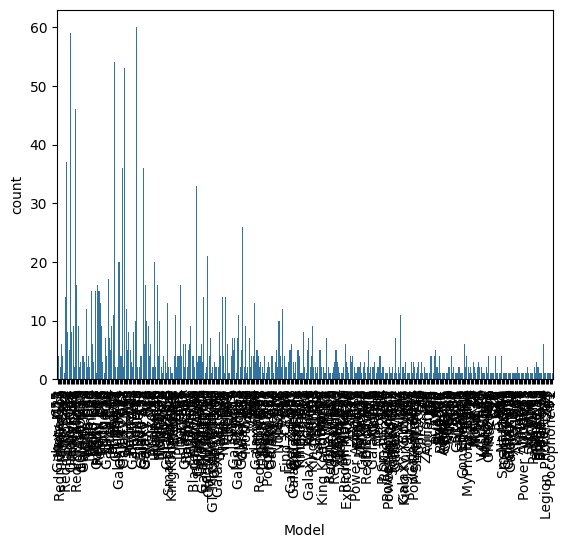

In [24]:
sns.countplot(x="Model",data=df,legend=True)
plt.xticks(rotation='vertical')
plt.show()

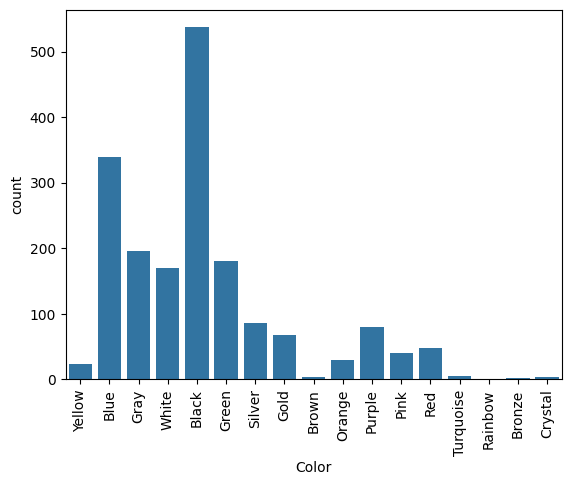

In [25]:
sns.countplot(x="Color",data=df,legend=True)
plt.xticks(rotation='vertical')
plt.show()

In [26]:
df["Galaxy"] = df["Model"].apply(lambda x:1 if "Galaxy" in x else 0)
df["iPhone"] = df["Model"].apply(lambda x:1 if "iPhone" in x else 0)

In [27]:
df['Model'].value_counts()

Model
iPhone 13       60
iPhone 14       59
iPhone 12       54
Galaxy S23      53
11 Pro          46
                ..
Jasper 2         1
A53s             1
G21              1
A57              1
Pocophone F2     1
Name: count, Length: 383, dtype: int64

In [28]:
df.sample(5)

,Smartphone,Brand,Model,RAM,Storage,Color,Final Price,Galaxy,iPhone
760,Apple iPhone XR 128 GB Negro Libre,Apple,iPhone XR,8.0,128.0,Black,398.48,0,1
657,Motorola Moto G62 5G 4/128GB Gris Libre,Motorola,Moto G62,4.0,128.0,Gray,186.98,0,0
276,Xiaomi Redmi Note 12S 6/128GB Negro Ónix Libre,Xiaomi,Note 12S,6.0,128.0,Black,209.00,0,0
235,POCO X5 5G 6/128GB Negro Libre,POCO,X5,6.0,128.0,Black,299.99,0,0
389,Apple iPhone 12 128GB Púrpura Libre,Apple,iPhone 12,8.0,128.0,Purple,859.00,0,1


<Axes: xlabel='Galaxy'>

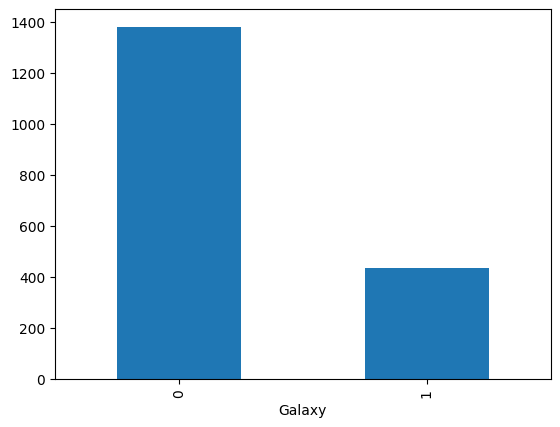

In [29]:
df["Galaxy"].value_counts().plot(kind="bar")

<Axes: xlabel='iPhone', ylabel='Final Price'>

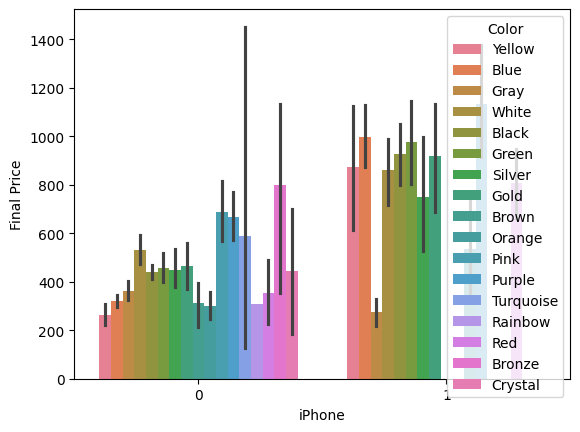

In [30]:
sns.barplot(x=df["iPhone"],y=df["Final Price"],hue=df["Color"])

<Axes: xlabel='Brand'>

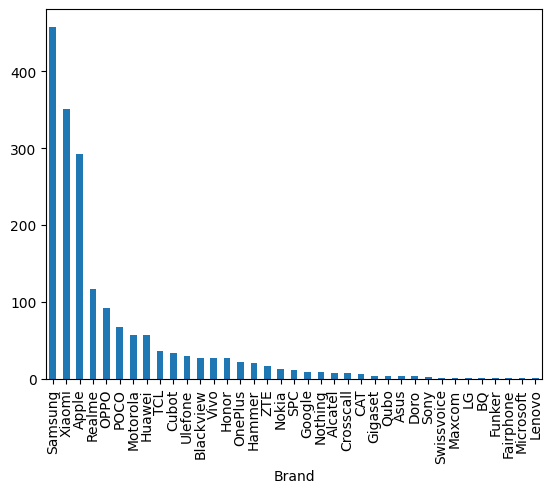

In [31]:
df["Brand"].value_counts().plot(kind="bar")

<Axes: ylabel='count'>

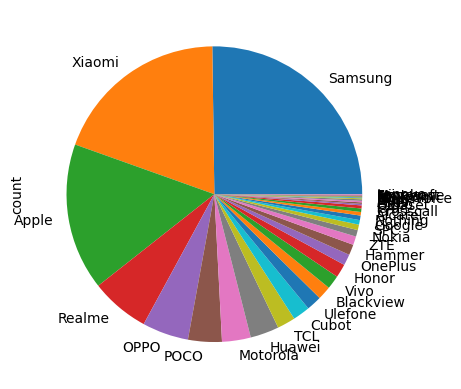

In [32]:
df["Brand"].value_counts().plot(kind="pie")

In [33]:
len(df["Brand"].unique())

37

In [34]:
top_brands = df['Brand'].value_counts().nlargest(6).index.tolist()

In [35]:
top_brands

['Samsung', 'Xiaomi', 'Apple', 'Realme', 'OPPO', 'POCO']

In [36]:
df = df[df['Brand'].isin(top_brands)]

In [37]:
df.isnull().sum()

Smartphone     0
Brand          0
Model          0
RAM            0
Storage        0
Color          0
Final Price    0
Galaxy         0
iPhone         0
dtype: int64

In [38]:
df['Brand'].unique()

array(['Realme', 'Samsung', 'Xiaomi', 'POCO', 'Apple', 'OPPO'],
      dtype=object)

<Axes: xlabel='Brand'>

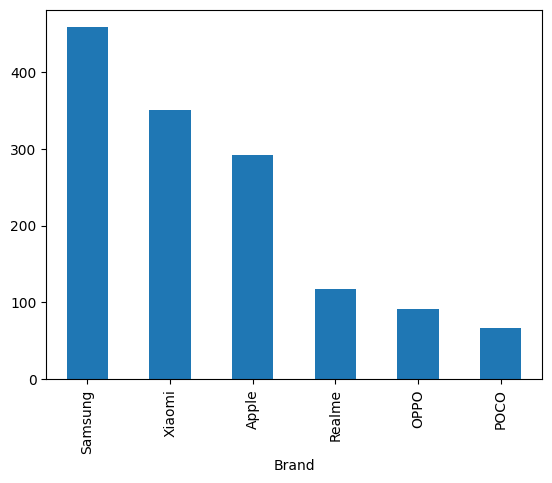

In [39]:
df['Brand'].value_counts().plot(kind="bar")

In [40]:
df.sample(5)

,Smartphone,Brand,Model,RAM,Storage,Color,Final Price,Galaxy,iPhone
936,OPPO A76 4/128GB Glowing Blue Libre,OPPO,A76,4.0,128.0,Blue,263.97,0,0
65,Realme GT2 8/128GB Blanco Libre,Realme,GT2,8.0,128.0,White,552.59,0,0
1201,Xiaomi 12X 8/256GB 5G Azul Libre,Xiaomi,12X,8.0,256.0,Blue,773.50,0,0
1541,Samsung Galaxy A53 5G 6/128GB Naranja Libre Ve...,Samsung,Galaxy A53,6.0,128.0,Orange,417.55,1,0
778,Samsung Galaxy A13 3/32GB Negro Libre,Samsung,Galaxy A13,3.0,32.0,Black,165.00,1,0


In [41]:
top_colors = df['Color'].value_counts().nlargest(8).index.tolist()
df = df[df["Color"].isin(top_colors)]

In [42]:
df.head()

,Smartphone,Brand,Model,RAM,Storage,Color,Final Price,Galaxy,iPhone
1,Samsung Galaxy M23 5G 4/128GB Azul Libre,Samsung,Galaxy M23,4.0,128.0,Blue,279.00,1,0
3,Xiaomi Redmi Note 11S 6/128GB Gris Libre,Xiaomi,Redmi Note 11S,6.0,128.0,Gray,279.99,0,0
7,Realme 9 Pro 5G 8/128GB Negro Libre,Realme,9 Pro,8.0,128.0,Black,352.59,0,0
8,Samsung Galaxy M23 5G 4/128GB Verde Libre,Samsung,Galaxy M23,4.0,128.0,Green,279.00,1,0
9,Xiaomi Redmi Note 12 Pro 8/256GB Gris Grafito ...,Xiaomi,Redmi Note 12,8.0,256.0,Gray,329.99,0,0


In [43]:
df.shape

(1262, 9)

<Axes: xlabel='Color'>

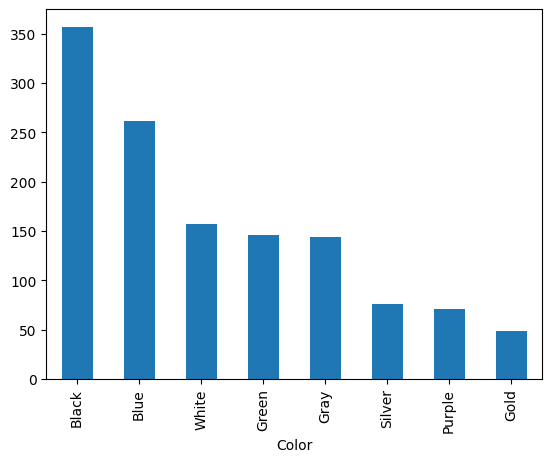

In [44]:
df["Color"].value_counts().plot(kind="bar")

In [45]:
df["Redmi"] = df["Model"].apply(lambda x:1 if "Redmi" in x else 0)

In [46]:
df.sample(10)

,Smartphone,Brand,Model,RAM,Storage,Color,Final Price,Galaxy,iPhone,Redmi
1077,Apple iPhone 11 Pro Max 256GB Oro Libre,Apple,11 Pro,8.0,256.0,Gold,559.00,0,0,0
1731,Apple iPhone 13 Pro 512GB Azul Sierra Libre,Apple,iPhone 13,8.0,512.0,Blue,1509.00,0,1,0
1668,Xiaomi POCO M3 Pro 5G 4/64GB Azul Libre,Xiaomi,POCO M3,4.0,64.0,Blue,212.23,0,0,0
384,Samsung Galaxy A52s 5G 6/128GB Negro Libre,Samsung,Galaxy A52s,6.0,128.0,Black,380.00,1,0,0
282,Apple iPhone 13 256GB Blanco Estrella Libre,Apple,iPhone 13,8.0,256.0,White,1029.01,0,1,0
592,OPPO A77 5G 4/64GB Negro Libre,OPPO,A77,4.0,64.0,Black,442.23,0,0,0
1232,Xiaomi Mi 10T Pro 5G 8/256GB Plata Libre,Xiaomi,Mi 10T,8.0,256.0,Silver,599.00,0,0,0
748,Oppo Find X2 Neo 12/256GB 5G Negro Libre,OPPO,Find X2 Neo,12.0,256.0,Black,189.00,0,0,0
900,Oppo A74 6/128GB Azul Libre,OPPO,A74,6.0,128.0,Blue,259.00,0,0,0
1530,Samsung Galaxy A41 4/64GB Azul Libre,Samsung,Galaxy A41,4.0,64.0,Blue,384.47,1,0,0


In [47]:
df["Oppo"] = df[df["Brand"] == "OPPO"]["Model"].apply(lambda x: f'Oppo {x}').apply(lambda x: 1 if 'Oppo' in x else 0)

In [48]:
df["Oppo"].isnull().sum()

1173

In [49]:
df["Oppo"] = df["Oppo"].fillna(0)

In [50]:
df.sample(5)

,Smartphone,Brand,Model,RAM,Storage,Color,Final Price,Galaxy,iPhone,Redmi,Oppo
483,Oppo Find X3 Pro 12/256GB Negro Libre,OPPO,X3,12.0,256.0,Black,1169.00,0,0,0,1.0
544,POCO F5 5G 12/256GB Blanco Libre,POCO,F5,12.0,256.0,White,479.99,0,0,0,0.0
529,Xiaomi Redmi 10C 4/128GB Verde Libre,Xiaomi,Redmi 10C,4.0,128.0,Green,158.99,0,0,1,0.0
840,Samsung Galaxy A71 6/128GB Prism Crush Black,Samsung,Galaxy A71,6.0,128.0,Black,543.37,1,0,0,0.0
1209,Oppo Reno4 5G 8/128GB Space Black Libre,OPPO,Reno4,8.0,128.0,Black,599.00,0,0,0,1.0


In [51]:
df["Oppo"] = df["Oppo"].astype(int)

In [52]:
df.isnull().sum()

Smartphone     0
Brand          0
Model          0
RAM            0
Storage        0
Color          0
Final Price    0
Galaxy         0
iPhone         0
Redmi          0
Oppo           0
dtype: int64

In [53]:
df.sample(5)

,Smartphone,Brand,Model,RAM,Storage,Color,Final Price,Galaxy,iPhone,Redmi,Oppo
1791,Samsung Galaxy Z Fold3 5G 256GB Negro + Funda ...,Samsung,Galaxy Z Fold3,8.0,256.0,Black,1599.00,1,0,0,0
1459,Oppo Reno4 Z 5G 8/128GB Ink Black Libre,OPPO,Reno4,8.0,128.0,Black,353.01,0,0,0,1
1735,Apple iPhone 6s 32GB Dorado Libre,Apple,iPhone 6s,8.0,32.0,Gold,136.00,0,1,0,0
30,Realme C53 6/128GB 33W Carga Rápida Negro Libre,Realme,C53,6.0,128.0,Black,181.60,0,0,0,0
633,Samsung Galaxy A13 A137 4/128GB Negro Libre,Samsung,Galaxy A13,4.0,128.0,Black,199.00,1,0,0,0


In [54]:
df["Realme"] = df[df["Brand"] == "Realme"]["Model"].apply(lambda x: f'Realme {x}').apply(lambda x: 1 if 'Realme' in x else 0)
df["Realme"] = df["Realme"].fillna(0)
df["Realme"] = df["Realme"].astype(int)

In [55]:
df.sample(5)

,Smartphone,Brand,Model,RAM,Storage,Color,Final Price,Galaxy,iPhone,Redmi,Oppo,Realme
1743,Apple iPhone XR 256GB Azul Libre,Apple,iPhone XR,8.0,256.0,Blue,439.00,0,1,0,0,0
1064,Samsung Galaxy A04s 3/32GB Blanco Libre,Samsung,Galaxy A04s,3.0,32.0,White,137.99,1,0,0,0,0
1292,Samsung Galaxy S20 Plus 12/128GB 5G Cloud Whit...,Samsung,Galaxy S20,12.0,128.0,White,319.00,1,0,0,0,0
1167,Apple iPhone 13 Pro 128GB Grafito Libre,Apple,iPhone 13,8.0,128.0,Black,1159.00,0,1,0,0,0
631,Apple iPhone X 64GB Gris Espacial Libre,Apple,iPhone X,8.0,64.0,Gray,269.00,0,1,0,0,0


In [56]:
df["Xiaomi"] = df[df["Brand"] == "Xiaomi"]["Model"].apply(lambda x: f'Xiaomi {x}').apply(lambda x: 1 if 'Xiaomi' in x else 0)
df["Xiaomi"] = df["Xiaomi"].fillna(0)
df["Xiaomi"] = df["Xiaomi"].astype(int)

In [57]:
df[df["Brand"] == "Apple"]["Model"].sample(20)

177     iPhone 11
803     iPhone 12
191     iPhone 12
1244       11 Pro
860     iPhone 12
31      iPhone 14
176     iPhone 14
762     iPhone SE
795     iPhone 14
703     iPhone 12
1733    iPhone 13
939     iPhone XR
932     iPhone XR
784     iPhone 12
382     iPhone 14
277     iPhone XS
1737    iPhone 6s
282     iPhone 13
754     iPhone 13
408     iPhone 12
Name: Model, dtype: object

In [58]:
df["iPhone"] = df[df["Brand"] == "iPhone"]["Model"].apply(lambda x: f'iPhone {x}').apply(lambda x: 1 if 'iPhone' in x else 0)
df["iPhone"] = df["iPhone"].fillna(0)
df["iPhone"] = df["iPhone"].astype(int)

/var/folders/25/n218mgyj6x1gybvn2ytyr2xc0000gp/T/ipykernel_2527/1822867903.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["iPhone"] = df["iPhone"].fillna(0)


In [59]:
df.sample(5)

,Smartphone,Brand,Model,RAM,Storage,Color,Final Price,Galaxy,iPhone,Redmi,Oppo,Realme,Xiaomi
1124,Xiaomi Redmi Note 10 5G 4/64Gb Gris Libre,Xiaomi,Redmi Note 10,4.0,64.0,Gray,229.99,0,0,1,0,0,1
625,Samsung Galaxy Note 10 Lite 6/128GB Aura Black,Samsung,Galaxy Note 10,6.0,128.0,Black,219.00,1,0,0,0,0,0
1455,Oppo A94 5G 8/128GB Azul Libre,OPPO,A94,8.0,128.0,Blue,379.00,0,0,0,1,0,0
721,Apple iPhone 12 Pro Max 128GB Grafito Libre,Apple,iPhone 12,8.0,128.0,Black,913.88,0,0,0,0,0,0
842,Samsung Galaxy XCover6 Pro 6/128GB Negro Libre...,Samsung,Galaxy XCover6,6.0,128.0,Black,623.71,1,0,0,0,0,0


In [60]:
df.drop(columns=['iPhone'],inplace=True)

In [61]:
df["iPhone"] = df[df["Brand"] == "Apple"]["Model"].apply(lambda x: f'iPhone {x}').apply(lambda x: 1 if 'iPhone' in x else 0)
df["iPhone"] = df["iPhone"].fillna(0)
df["iPhone"] = df["iPhone"].astype(int)

In [62]:
df['Galaxy_Series'] = df[df["Brand"] == "Samsung"]["Model"].apply(lambda x: f'Galaxy {x}' if 'Galaxy' not in x else x)

In [63]:
df["5G"] = df["Smartphone"].apply(lambda x: 1 if '5G' in x else 0)
df["5G"].fillna(0)

1       1
3       0
7       1
8       1
9       0
       ..
1811    0
1812    0
1813    0
1814    0
1815    0
Name: 5G, Length: 1262, dtype: int64

In [64]:
df.sample(5)
df["5G"].value_counts()

5G
0    843
1    419
Name: count, dtype: int64

In [65]:
df["Storage"].astype('int')
df["RAM"].astype('int')
df.sample(5)

,Smartphone,Brand,Model,RAM,Storage,Color,Final Price,Galaxy,Redmi,Oppo,Realme,Xiaomi,iPhone,Galaxy_Series,5G
1278,Apple iPhone 13 Pro 512GB Grafito Libre,Apple,iPhone 13,8.0,512.0,Black,1509.0,0,0,0,0,0,1,NaN,0
1688,Xiaomi Redmi A1 Plus 2/32GB Azul Libre,Xiaomi,Redmi A1,2.0,32.0,Blue,117.2,0,1,0,0,1,0,NaN,0
501,Xiaomi 13 8/256GB Verde Libre,Xiaomi,13,8.0,256.0,Green,825.4,0,0,0,0,1,0,NaN,0
1521,Samsung Galaxy A23 5G 4/128GB Azul Libre Versi...,Samsung,Galaxy A23,4.0,128.0,Blue,252.3,1,0,0,0,0,0,Galaxy A23,1
562,Samsung Galaxy S20 FE 5G 6/128GB Lavanda Libre,Samsung,Galaxy S20,6.0,128.0,Blue,649.0,1,0,0,0,0,0,Galaxy S20,1


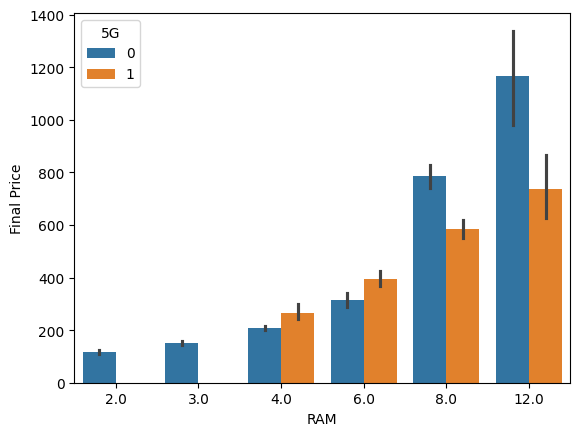

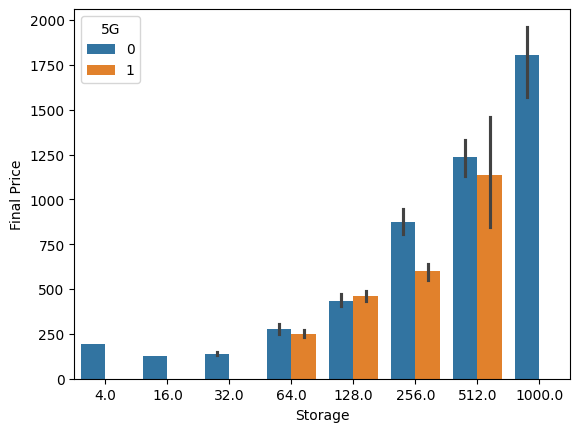

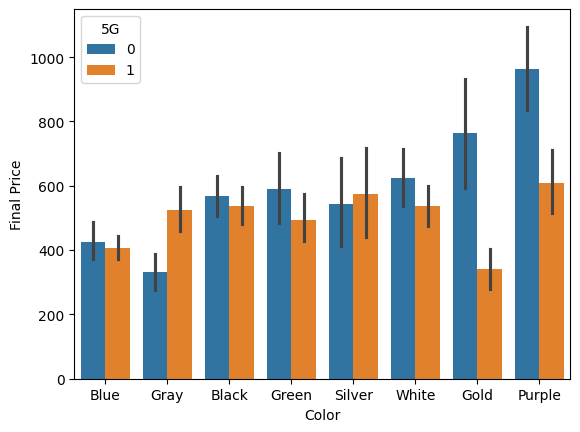

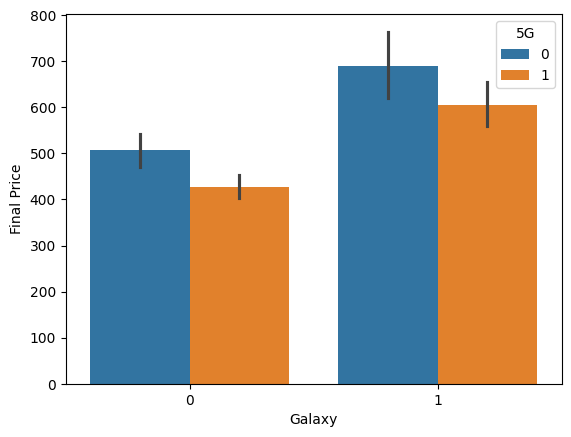

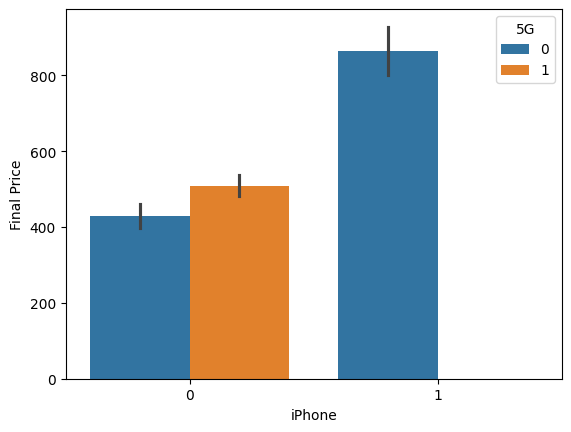

In [66]:
rel = ['RAM','Storage','Color','Galaxy','iPhone']
for i in rel:
    sns.barplot(x=df[i],y=df["Final Price"],hue=df["5G"])
    plt.show()


In [67]:
df["Galaxy_Series"] = df["Model"].apply(lambda x: x.split(' ')[1] if 'Galaxy S' in x else 'No')

In [68]:
df["Galaxy_Series"].value_counts()

Galaxy_Series
No     1106
S23      53
S21      34
S22      28
S20      27
S10       7
S8        5
S9        2
Name: count, dtype: int64

In [69]:
from sklearn.preprocessing import OneHotEncoder

In [70]:
df.sample(5)

,Smartphone,Brand,Model,RAM,Storage,Color,Final Price,Galaxy,Redmi,Oppo,Realme,Xiaomi,iPhone,Galaxy_Series,5G
115,Apple iPhone 11 64 GB Blanco Libre,Apple,iPhone 11,8.0,64.0,White,589.00,0,0,0,0,0,1,No,0
33,Realme 10 AMOLED FHD+ 8/256GB Blanco Libre,Realme,10 AMOLED,8.0,256.0,White,301.60,0,0,0,1,0,0,No,0
708,OPPO Reno8 Pro 5G 8/256GB Verde Libre,OPPO,Reno8,8.0,256.0,Green,699.00,0,0,1,0,0,0,No,1
1652,Xiaomi 12T 8/128GB Azul Libre,Xiaomi,12T,8.0,128.0,Blue,599.99,0,0,0,0,1,0,No,0
1150,Samsung Galaxy Z Flip4 8/256GB Gris Libre,Samsung,Galaxy Z Flip4,8.0,256.0,Gray,869.00,1,0,0,0,0,0,No,0


In [71]:
df["Color"].unique()

array(['Blue', 'Gray', 'Black', 'Green', 'Silver', 'White', 'Gold',
       'Purple'], dtype=object)

In [72]:
ohe = OneHotEncoder()
encoded_color = ohe.fit_transform(df[["Color"]])
encoded_color_dataframe = pd.DataFrame(encoded_color.toarray(),columns=df["Color"].unique())

In [73]:
df.reset_index(drop=True, inplace=True)
encoded_color_dataframe.reset_index(drop=True, inplace=True)
df = pd.concat([df, encoded_color_dataframe], axis=1)
df.shape

(1262, 23)

In [74]:
df.sample(5)

,Smartphone,Brand,Model,RAM,Storage,Color,Final Price,Galaxy,Redmi,Oppo,...,Galaxy_Series,5G,Blue,Gray,Black,Green,Silver,White,Gold,Purple
298,OPPO A57s 4/128GB Negro Libre + Cable USB 3.1 ...,OPPO,A57s,4.0,128.0,Black,202.59,0,0,1,...,No,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
235,Realme Narzo 50 4/128GB Negro Libre,Realme,Narzo 50,4.0,128.0,Black,222.59,0,0,0,...,No,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
401,Samsung Galaxy S10 8/128GB Negro Libre,Samsung,Galaxy S10,8.0,128.0,Black,520.15,1,0,0,...,S10,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
939,Apple iPhone 12 Mini 128GB Púrpura Libre,Apple,iPhone 12,8.0,128.0,Purple,739.00,0,0,0,...,No,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
209,Samsung Galaxy S23 Plus 512GB Verde Libre,Samsung,Galaxy S23,8.0,512.0,Green,1126.89,1,0,0,...,S23,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [75]:
df.drop(columns=["Smartphone","Brand","Model","Color","Galaxy_Series"],inplace=True)

In [76]:
df.sample(5)

,RAM,Storage,Final Price,Galaxy,Redmi,Oppo,Realme,Xiaomi,iPhone,5G,Blue,Gray,Black,Green,Silver,White,Gold,Purple
169,8.0,256.0,819.94,1,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
488,8.0,64.0,413.00,0,0,0,0,0,1,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
141,8.0,64.0,363.00,0,0,0,0,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
345,8.0,256.0,343.99,0,0,0,0,0,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
696,8.0,64.0,279.00,0,0,0,0,0,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [77]:
df.isnull().sum()

RAM            0
Storage        0
Final Price    0
Galaxy         0
Redmi          0
Oppo           0
Realme         0
Xiaomi         0
iPhone         0
5G             0
Blue           0
Gray           0
Black          0
Green          0
Silver         0
White          0
Gold           0
Purple         0
dtype: int64

In [78]:
df.shape

(1262, 18)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1262 entries, 0 to 1261
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   RAM          1262 non-null   float64
 1   Storage      1262 non-null   float64
 2   Final Price  1262 non-null   float64
 3   Galaxy       1262 non-null   int64  
 4   Redmi        1262 non-null   int64  
 5   Oppo         1262 non-null   int64  
 6   Realme       1262 non-null   int64  
 7   Xiaomi       1262 non-null   int64  
 8   iPhone       1262 non-null   int64  
 9   5G           1262 non-null   int64  
 10  Blue         1262 non-null   float64
 11  Gray         1262 non-null   float64
 12  Black        1262 non-null   float64
 13  Green        1262 non-null   float64
 14  Silver       1262 non-null   float64
 15  White        1262 non-null   float64
 16  Gold         1262 non-null   float64
 17  Purple       1262 non-null   float64
dtypes: float64(11), int64(7)
memory usage: 177.6 KB


In [80]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [81]:
y = df["Final Price"]
x = df.drop(columns=["Final Price"])

X_train,X_test,Y_train,Y_test = train_test_split(x,y, test_size=0.09, random_state=40)

In [82]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [83]:
# pca = PCA(n_components=14)

# X_train_pca = pca.fit_transform(X_train_scaled)
# X_test_pca = pca.fit_transform(X_test_scaled)

model = SGDRegressor()
model.fit(X_train_scaled,Y_train)

SGDRegressor()

In [84]:
y_pred = model.predict(X_test_scaled)

In [85]:
r2_score(Y_test,y_pred)

0.7441889345020058

In [86]:
Y_test.shape

(114,)

In [87]:
y_pred

array([ 7.95573053e+01,  8.08813972e+02,  7.36270152e+02,  1.72789954e+03,
        6.42850514e+02,  7.79925638e+01,  8.38666345e+02,  5.58523303e+02,
        2.16064527e+02,  4.63129536e+02,  2.08268549e+02,  3.16317547e+02,
        9.40436178e+02,  7.33321985e+02,  9.11210165e+02,  6.23694200e+02,
        2.20738949e+02,  4.60971268e+02,  2.93694957e+02, -1.88827962e+01,
        8.16288276e+02,  1.68674050e+03,  1.14045865e+03,  4.85568125e+02,
        8.98778121e+02,  8.16288276e+02,  1.13003618e+03,  2.20738949e+02,
        1.13998677e+03,  4.12298950e+02,  3.34122381e+02,  4.07664909e+02,
        7.03569142e+02,  4.63129536e+02,  1.98116359e+02,  3.36572908e+02,
        7.64439673e+02,  5.52433255e+02,  1.28277637e+02,  5.57236054e+02,
        3.18003421e+02,  5.91964036e+02,  5.02063925e+02,  8.99949846e+00,
        4.03114378e+02,  1.58499896e+02,  7.49124977e+02,  2.54470422e+02,
        1.68674050e+03,  2.06113933e+02,  1.13298435e+03,  2.57754209e+02,
        8.05865805e+02,  

In [88]:
X_test_scaled.shape

(114, 17)

In [89]:
Y_test

1026     168.44
340      959.00
1095     681.00
1200    1839.00
726      457.00
         ...   
485      589.00
86       389.95
821      559.00
215      954.00
538      199.99
Name: Final Price, Length: 114, dtype: float64

In [90]:
X_test_scaled[1]

array([0.6       , 0.23140496, 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.        ])

In [91]:
d = [0.6, 0.23140496, 1., 0., 0. ,0., 0., 0., 0., 0.,0., 0., 0., 0., 0., 0., 1.]
d

[0.6,
 0.23140496,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0]

In [92]:
p = np.array([0.6, 0.23140496, 1., 0., 0. ,0., 0., 0., 0., 0.,0., 0., 0., 0., 0., 0., 1.])

In [93]:
model.predict(p.reshape(1, -1))

array([808.81397403])

In [94]:
x.sample(4)

,RAM,Storage,Galaxy,Redmi,Oppo,Realme,Xiaomi,iPhone,5G,Blue,Gray,Black,Green,Silver,White,Gold,Purple
185,4.0,64.0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
258,12.0,256.0,0,0,0,0,0,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
204,4.0,128.0,0,1,0,0,1,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
383,8.0,32.0,0,0,0,0,0,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [95]:
p.reshape(1, -1)

array([[0.6       , 0.23140496, 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        ]])

In [96]:
s = pd.DataFrame(X_test_scaled,columns=x.columns)

In [97]:
y_pred.shape

(114,)

In [98]:
Y_test.shape

(114,)

In [102]:
predicted = pd.DataFrame(y_pred,columns=["Predicted"])

In [107]:
predicted.reset_index(drop=True, inplace=True)
Y_test.reset_index(drop=True, inplace=True)

predicted["Actual"] = Y_test

In [109]:
predicted.shape

(114, 2)